In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import functions as f

In [2]:
graph = {
        0: {1: 0.8, 2: 0.5},
        1: {0: 0.8, 3: 0.6},
        2: {0: 0.5, 4: 0.7},
        3: {1: 0.6, 5: 0.9, 4:0.1},
        4: {2: 0.7},
        5: {3: 0.9, 6: 0.4},
        6: {5: 0.4},
        7: {5: 0.4, 6: 0.5}
    }

clusters_1 = [
        {0: {1: 0.8, 2: 0.5}, 1: {0: 0.8, 3: 0.6}, 2: {0: 0.5, 4: 0.7}, 3: {1: 0.6, 5: 0.9, 4:0.1},4: {2: 0.7}},  
        {5: {3: 0.9, 6: 0.4},6: {5: 0.4}, 7: {5: 0.4, 6: 0.5}}                   
    ]

clusters_2 = [
        {0: {1: 0.8, 2: 0.5}, 1: {0: 0.8, 3: 0.6}, 2: {0: 0.5, 4: 0.7}, 3: {1: 0.6, 5: 0.9, 4:0.1}, 7: {5: 0.4, 6: 0.5}}, 
        {5: {3: 0.9, 6: 0.4},6: {5: 0.4}, 4: {2: 0.7} }                       
    ]



C:\Users\Yayi Wang\AppData\Local\Temp\ipykernel_12696\1596657136.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_colors = plt.cm.get_cmap('tab10', len(clusters))


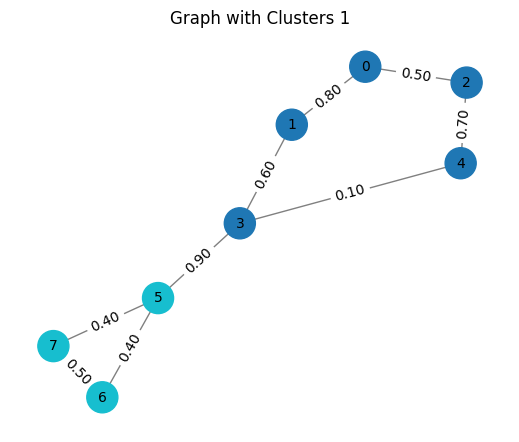

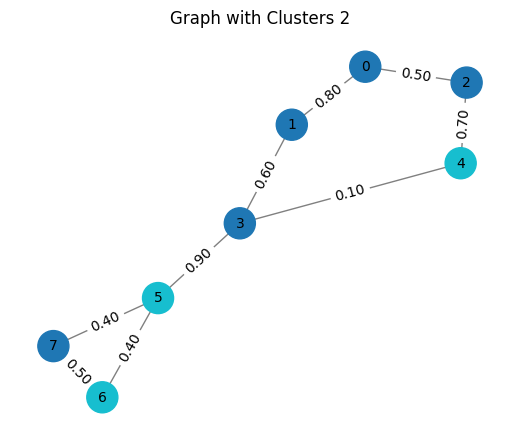

In [3]:
def visualize_graph(graph, clusters, title="Graph Visualization"):
    """
    Visualizes a graph with clusters.
    
    Parameters:
    - graph: Dictionary where keys are nodes, and values are dictionaries of neighbors with edge weights.
    - clusters: List of dictionaries, where each dictionary represents a cluster.
    - title: Title of the visualization.
    """
    G = nx.Graph()
    
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    color_map = []
    node_to_cluster = {}  
    cluster_colors = plt.cm.get_cmap('tab10', len(clusters))  
    
    for cluster_idx, cluster in enumerate(clusters):
        for node in cluster.keys():
            node_to_cluster[node] = cluster_idx
    
    for node in G.nodes:
        if node in node_to_cluster:
            color_map.append(cluster_colors(node_to_cluster[node]))
        else:
            color_map.append("gray")  
    
    pos = nx.spring_layout(G, seed=42)  
    
    plt.figure(figsize=(5, 4))
    nx.draw(
        G, pos, node_color=color_map, with_labels=True, 
        node_size=500, font_size=10, edge_color="gray"
    )
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
    
    plt.title(title)
    plt.show()


visualize_graph(graph, clusters_1, title="Graph with Clusters 1")
visualize_graph(graph, clusters_2, title="Graph with Clusters 2")

In [4]:

modularity_1 = f.girvan_newman_modularity(graph, clusters_1)
modularity_2 = f.girvan_newman_modularity(graph, clusters_2)
    
print(f"modularity Q_1: {modularity_1:.4f}")
print(f"modularity Q_2: {modularity_2:.4f}")


if abs(modularity_1 - 1) < abs(modularity_2 -1):
    optical_cluster = "Clustering 1"
else :
    optical_cluster = "Clustering 2"

print(f"{optical_cluster} is the optimal clustering configuration ")

modularity Q_1: 0.3111
modularity Q_2: -0.0756
Clustering 1 is the optimal clustering configuration 
